# Human Face Detection

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivpoojansingh123","key":"c7d55648ac917d161a350996494d3a1a"}'}

## Download dataset

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes")

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes


100%|██████████| 309M/309M [00:01<00:00, 176MB/s]

In [5]:
# Create directory
train_dir = "/content/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train"
test_dir = "/content/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test"

In [6]:
len(train_dir), len(test_dir)

(74, 73)

## Data Preprocessing

In [7]:
# Check images in every directory
import os
print("Training set distribution:")
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        print(f"{cls}: {len(os.listdir(cls_path))} images")

print("\nTest set distribution:")
for cls in os.listdir(test_dir):
    cls_path = os.path.join(test_dir, cls)
    if os.path.isdir(cls_path):
        print(f"{cls}: {len(os.listdir(cls_path))} images")


Training set distribution:
angry: 1525 images
sad: 2255 images
happy: 3019 images

Test set distribution:
angry: 515 images
sad: 757 images
happy: 1006 images


In [14]:
# Create input for model and resize
img_size = (224, 224)
batch_size = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 batch_size=batch_size,
                                                                 image_size=img_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size=batch_size,
                                                                image_size=img_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)
'''
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))
'''

Found 6799 files belonging to 3 classes.
Found 2278 files belonging to 3 classes.


'\ntrain_data = train_data.map(lambda x, y: (normalization_layer(x), y))\ntest_data = test_data.map(lambda x, y: (normalization_layer(x), y))\n'

In [9]:
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
# Number of class in datasets
class_name = train_data.class_names

## Visualization

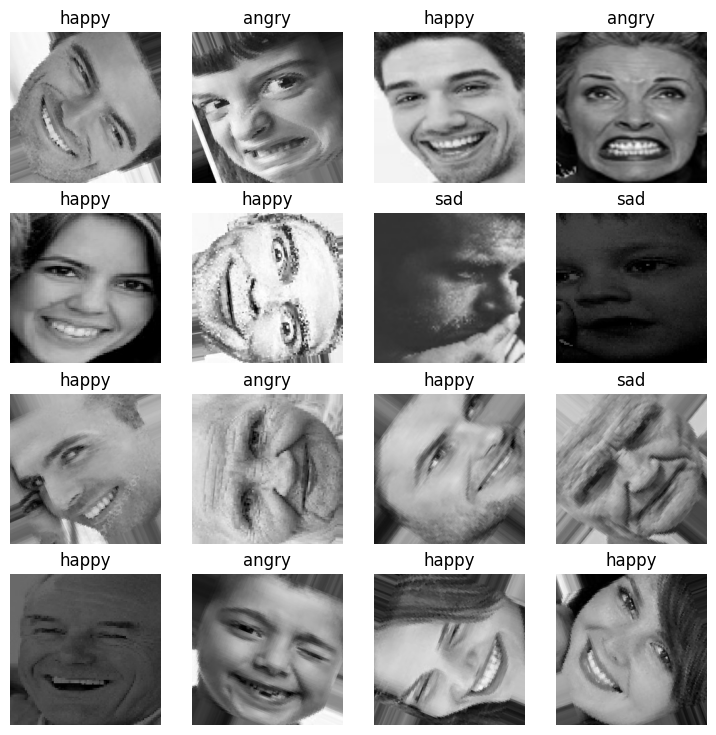

In [17]:
plt.figure(figsize = (9,9))

for images, labels in train_data.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(class_name[labels[i].numpy()])
    plt.axis("off")

# Confusion Matrix

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False, figsize=(8,6)):
    """
    Plots a confusion matrix for emotion detection.
    """
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # If y_pred contains probabilities, convert to class indices
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    # If y_true is one-hot encoded, convert to class indices
    if y_true.ndim > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Emotion")
    plt.ylabel("True Emotion")
    plt.title("Confusion Matrix for Emotion Detection")
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))


# Model

# Model 0

In [19]:
from tensorflow.keras import layers

In [51]:
model_0 = tf.keras.models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(3, activation="softmax")
])

In [52]:
model_0.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,199,363 (42.72 MB)

 Trainable params: 11,199,043 (42.72 MB)

 Non-trainable params: 320 (1.25 KB)

In [53]:
model_0.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [54]:
history_0 = model_0.fit(train_data, epochs=15, validation_data=test_data, validation_split=0.2, verbose=1)

Epoch 1/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 33s 120ms/step - accuracy: 0.4313 - loss: 1.6714 - val_accuracy: 0.5219 - val_loss: 1.4062
Epoch 2/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.4926 - loss: 1.3780 - val_accuracy: 0.5553 - val_loss: 1.1867
Epoch 3/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.5558 - loss: 1.1621 - val_accuracy: 0.5325 - val_loss: 1.1152
Epoch 4/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.5905 - loss: 1.1961 - val_accuracy: 0.4934 - val_loss: 1.3000
Epoch 5/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.6067 - loss: 1.1307 - val_accuracy: 0.5527 - val_loss: 1.1207
Epoch 6/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.6536 - loss: 1.0102 - val_accuracy: 0.6286 - val_loss: 1.0949
Epoch 7/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.6893 - loss: 0.9633 - val_accuracy: 0.6633 - val_loss: 0.9929
Epoch 8/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.7306 - loss: 0.8940 -

In [55]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))



  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

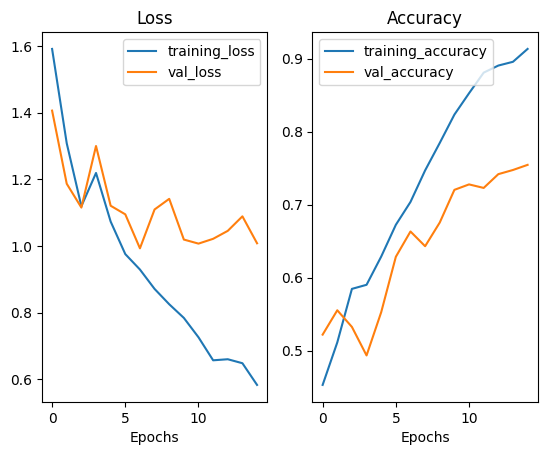

In [56]:
plot_loss_curves(history_0)

In [57]:
model_0.predict(test_data)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


array([[0.01276774, 0.9684785 , 0.01875377],
       [0.03944206, 0.7627222 , 0.19783564],
       [0.00963374, 0.00322162, 0.9871446 ],
       ...,
       [0.09475946, 0.51651424, 0.38872632],
       [0.04141814, 0.02278321, 0.9357987 ],
       [0.07018474, 0.80891776, 0.1208975 ]], dtype=float32)

In [58]:
loss, acc = model_0.evaluate(test_data)
print(f"Test Accuracy: {acc:.2%}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7671 - loss: 0.9651
Test Accuracy: 75.46%


In [59]:
import cv2

test_image = cv2.imread("/content/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test/angry/101071.jpg_rotation_1.jpg")
test_image = cv2.resize(test_image, (224, 224))

img = tf.constant(test_image)
img = tf.expand_dims(img, axis=0)

model_0.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


array([[0.5426054 , 0.07784497, 0.37954962]], dtype=float32)

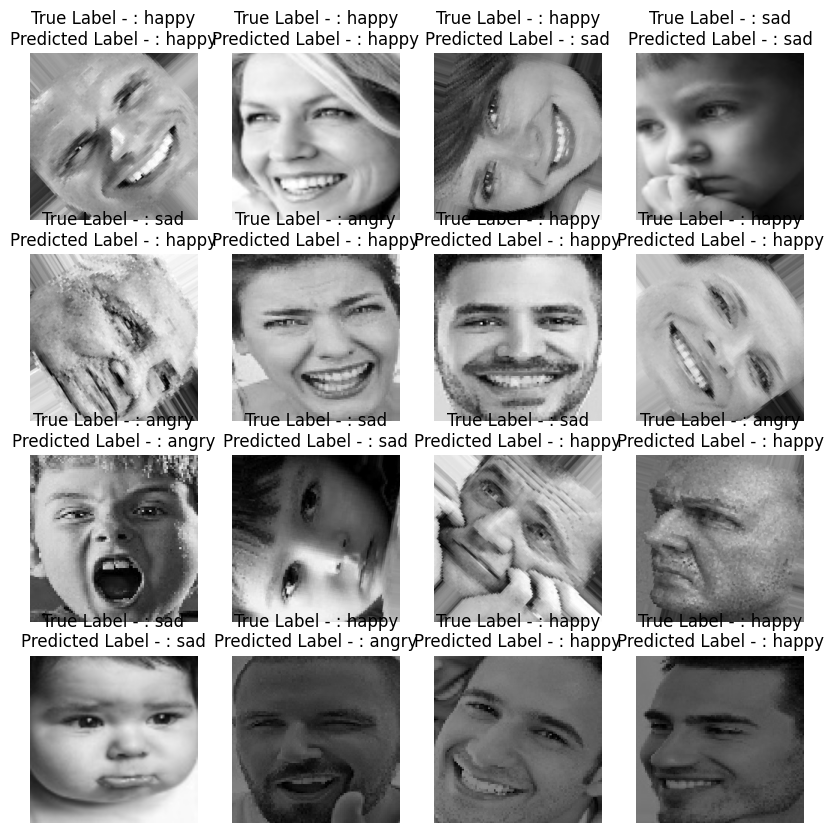

In [60]:
plt.figure(figsize = (10,10))

for images, labels in test_data.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + class_name[labels[i].numpy()]
              + "\n" + "Predicted Label - : "
              + class_name[int(tf.argmax(model_0(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")

In [61]:
loss, acc = model_0.evaluate(test_data)
print(f"Test Accuracy: {acc:.2%}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7630 - loss: 0.9650
Test Accuracy: 75.46%


In [62]:
pred_probs = model_0.predict(test_data, verbose=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [63]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([2, 0, 1, 1, 2, 2, 2, 1, 2, 1])

In [64]:
# Collect labels from test_data
y_labels_list = []
for _, labels in test_data.unbatch():
    y_labels_list.append(labels.numpy())  # each label is one-hot encoded

# Convert to array
y_labels = np.array(y_labels_list)

# If labels are one-hot encoded, convert to class indices
if y_labels.ndim > 1 and y_labels.shape[1] > 1:
    y_labels = np.argmax(y_labels, axis=1)

print("Unique labels in test set:", np.unique(y_labels))

Unique labels in test set: [0 1 2]


In [65]:
model_0.save("model_0.h5")

In [66]:
print("Unique in y_true:", np.unique(y_labels))
print("Unique in y_pred:", np.unique(pred_classes))
print("Class names:", class_name)

Unique in y_true: [0 1 2]
Unique in y_pred: [0 1 2]
Class names: ['angry', 'happy', 'sad']


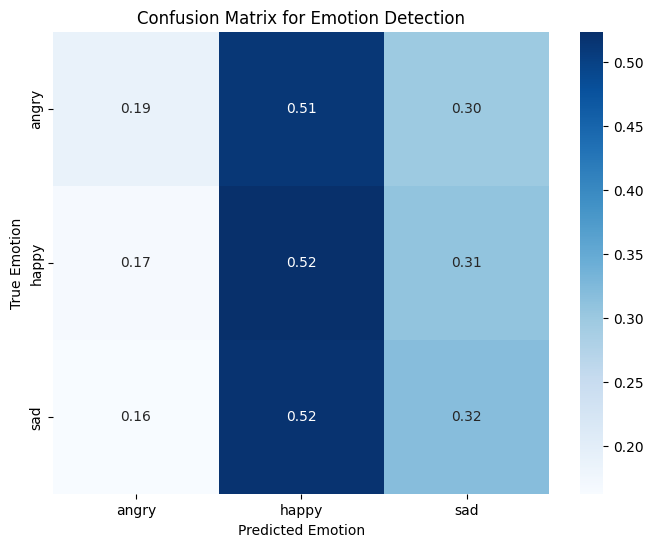


Classification Report:
              precision    recall  f1-score   support

       angry       0.25      0.19      0.21       515
       happy       0.45      0.52      0.48      1006
         sad       0.34      0.32      0.33       757

    accuracy                           0.38      2278
   macro avg       0.35      0.34      0.34      2278
weighted avg       0.37      0.38      0.37      2278



In [67]:
plot_confusion_matrix(y_true=y_labels, y_pred=pred_classes, class_names=class_name, normalize=True)